In [1]:
import keras
import numpy as np
import cv2
import os
import sys
import glob
import shutil
from matplotlib import pyplot as plt

from model import *
from data import *

Using TensorFlow backend.


In [2]:
path = './data/sky/iphone_full/test_myown/23.jpg'

In [3]:
model = unet_modify() 
model.load_weights('models/Unet.104-0.99_b.hdf5')

/home/dmitrii/.virtenvs/FaceIidentification/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '
/home/dmitrii/sky_detect/Semantic-Segmentation-Suite/UNET/sky-segmentation/keras_unet/model.py:79: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


In [4]:
tmp_files = './data/sky/test'

In [5]:
image = cv2.imread(path)
image = cv2.cvtColor(image, code=cv2.COLOR_BGR2RGB) / 255.
image_shape = (image.shape[0], image.shape[1])
image = cv2.resize(image, (256, 256))
#         image = np.expand_dims(image, 2)
image = np.expand_dims(image, 0)

raw_mask = model.predict(image)
saveResult(tmp_files, raw_mask)

image = cv2.imread(path)
image = cv2.cvtColor(image, code=cv2.COLOR_BGR2RGB)
s1, s2 = (image.shape[0], image.shape[1])
#         for i in range(3):
#                 plt.subplot(1,3,i+1),plt.imshow(image,'gray')
#                 plt.title('image')
#                 plt.xticks([]),plt.yticks([])

#         plt.show()

#         image = cv2.resize(image, (1024, 1024))

raw_mask = cv2.imread(os.path.join(tmp_files, '0.png'), 0)

/home/dmitrii/.virtenvs/FaceIidentification/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [6]:
blur = cv2.GaussianBlur(raw_mask,(5,5),0)
ret,thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Contour detection
_, contours, hierarchy = cv2.findContours( thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Filter contour by area
contour_list = []
area_threshold = 700

for contour in contours:
    area = cv2.contourArea(contour)
    if area > area_threshold :
        contour_list.append(contour)

# Making binary mask by contour        
countMask = np.zeros(thresh.shape, dtype='uint8')
cv2.drawContours(countMask, contour_list, -1, (255, 255, 255), cv2.FILLED)

# Restore accuracy of board between sky and other objects
mask = np.add(cv2.bitwise_not(thresh), cv2.bitwise_not(countMask))
mask = cv2.resize(mask, (s2, s1))

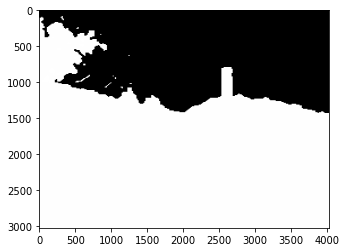

In [7]:
plt.imshow(mask, 'gray')

In [8]:
mask = cv2.bitwise_not(mask)

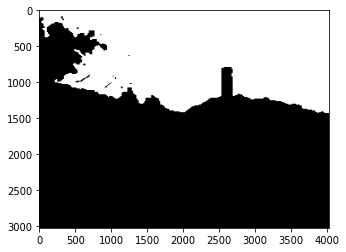

In [9]:
plt.imshow(mask, 'gray')

In [10]:
sky_image = cv2.imread('./data/sky/sky_3.jpg')
sky_image = cv2.cvtColor(sky_image, code=cv2.COLOR_BGR2RGB)

In [11]:
sky_image = cv2.resize(sky_image, (s2, s1))

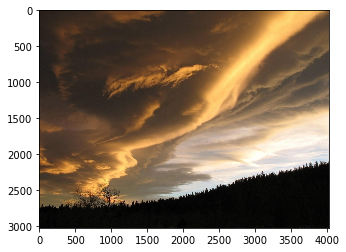

In [12]:
plt.imshow(sky_image)

In [13]:
test_mask = mask

In [14]:
rev_mask = cv2.bitwise_not(test_mask)

In [15]:
test_mask = test_mask / 255
rev_mask = rev_mask / 255

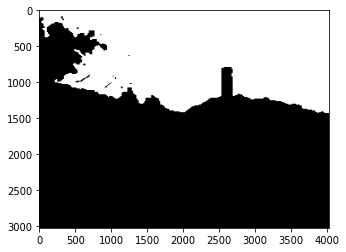

In [16]:
plt.imshow(test_mask, 'gray')

In [17]:
test_mask[test_mask > 0.5] = 1
test_mask[test_mask <= 0.5] = 0

In [18]:
rev_mask[rev_mask > 0.5] = 1
rev_mask[rev_mask <= 0.5] = 0

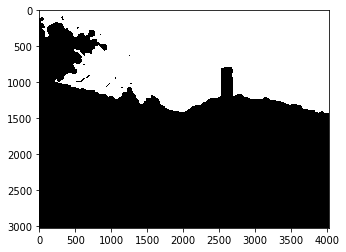

In [19]:
plt.imshow(test_mask, 'gray')

In [20]:
np.unique(rev_mask)

array([0., 1.])

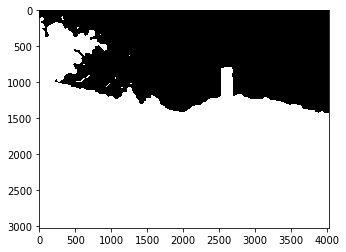

In [21]:
plt.imshow(rev_mask, 'gray')

In [22]:
test_mask = test_mask.astype(np.uint8)
rev_mask = rev_mask.astype(np.uint8)

In [23]:
np.unique(rev_mask)

array([0, 1], dtype=uint8)

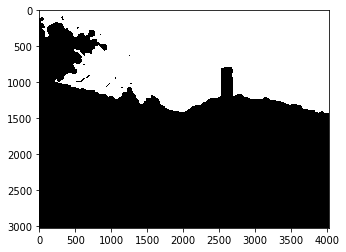

In [24]:
plt.imshow(test_mask, 'gray')

In [25]:
test_mask = np.expand_dims(test_mask, axis=2)
rev_mask = np.expand_dims(rev_mask, axis=2)

In [26]:
np.unique(rev_mask)

array([0, 1], dtype=uint8)

In [27]:
test_mask = np.concatenate([test_mask, test_mask, test_mask], axis=-1)
rev_mask = np.concatenate([rev_mask, rev_mask, rev_mask], axis=-1)

In [28]:
np.unique(rev_mask)

array([0, 1], dtype=uint8)

In [29]:
sky_mask = sky_image * test_mask

In [30]:
img = image.copy()

In [31]:
np.unique(rev_mask)

array([0, 1], dtype=uint8)

In [32]:
img = img * rev_mask

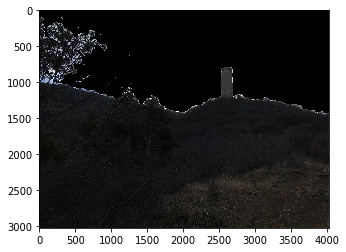

In [33]:
plt.imshow(img, 'gray')

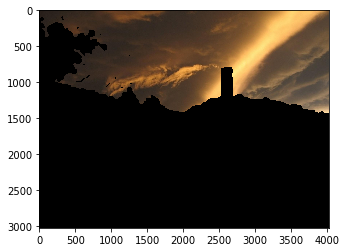

In [34]:
plt.imshow(sky_mask, 'gray')

In [35]:
rev_mask = rev_mask * 255

In [36]:
sky_mask += rev_mask

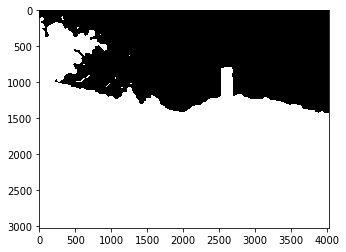

In [37]:
plt.imshow(rev_mask, 'gray')

In [38]:
sky_mask

array([[[ 41,  32,  27],
        [ 41,  32,  27],
        [ 41,  32,  27],
        ...,
        [141, 102,  59],
        [141, 102,  59],
        [141, 102,  59]],

       [[ 41,  32,  27],
        [ 41,  32,  27],
        [ 41,  32,  27],
        ...,
        [141, 102,  59],
        [141, 102,  59],
        [141, 102,  59]],

       [[ 40,  31,  27],
        [ 40,  31,  27],
        [ 40,  31,  27],
        ...,
        [141, 101,  59],
        [141, 101,  59],
        [141, 101,  59]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

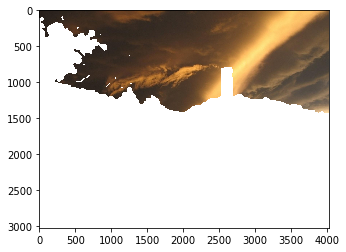

In [39]:
plt.imshow(sky_mask, 'gray')

In [40]:
result = cv2.addWeighted(image,0.3,sky_mask,0.5,0.4)

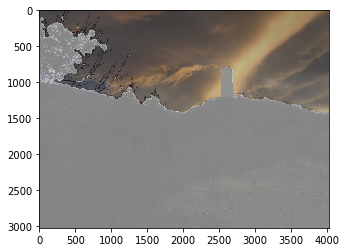

In [41]:
plt.imshow(result, 'gray')

In [42]:
io.imsave('1.jpg',result)

In [43]:
result_1 = np.add(img, sky_mask)

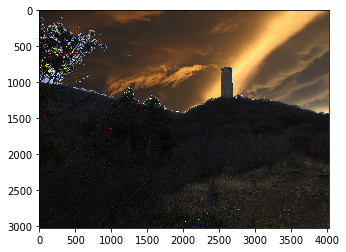

In [44]:
plt.imshow(result_1, 'gray')

In [45]:
io.imsave('2.jpg',result_1)

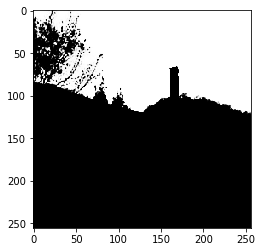

In [46]:
plt.imshow(raw_mask, 'gray')

In [47]:
np.unique(raw_mask)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [48]:
raw_mask = cv2.resize(raw_mask, (s2, s1))

In [49]:
raw_mask = raw_mask / 255

In [50]:
raw_mask[raw_mask > 0.5] = 1
raw_mask[raw_mask <= 0.5] = 0

In [51]:
np.unique(raw_mask)

array([0., 1.])

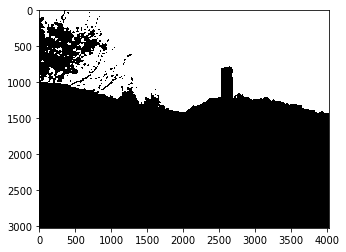

In [52]:
plt.imshow(raw_mask, 'gray')

In [53]:
raw_mask = raw_mask.astype(np.uint8)

In [54]:
raw_mask = np.expand_dims(raw_mask, 2)

In [55]:
sky_mask = sky_image * raw_mask

In [56]:
result = cv2.addWeighted(image,0.7,sky_mask,0.5,0.3)

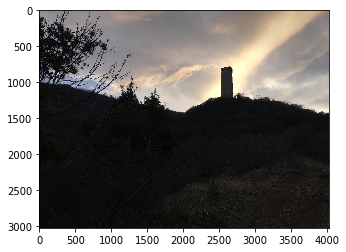

In [57]:
plt.imshow(result, 'gray')

In [58]:
io.imsave('1.jpg',result)

In [59]:
result_1 = np.add(img, sky_mask)

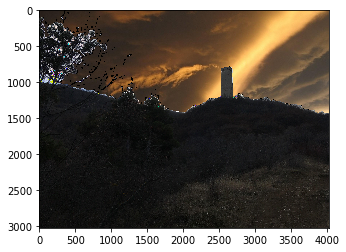

In [60]:
plt.imshow(result_1, 'gray')

In [61]:
io.imsave('2.jpg',result_1)